### Importing All The Required Libraries

In [424]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
pd.set_option('display.max_column', 500)

### Importing The Required Dataset

In [425]:
car_price = pd.read_csv("CarPrice_Assignment.csv")
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Sanitary Chekup

In [426]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [427]:
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [428]:
car_price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Understanding Data



In the 'CarName' column there is car company name and car model name is present so we need only company name  so we have to extract that 

In [429]:
CompanyName = car_price['CarName'].apply(lambda x : x.split(' ')[0])
car_price.insert(3,"CompanyName",CompanyName)
car_price.drop(['CarName'],axis=1,inplace=True)
car_price.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [430]:
print(car_price["CompanyName"].unique(), end = " ")
len(car_price["CompanyName"].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo'] 

28

From the above dataset we can clearly see that there is some spelling errors because of which they are considered as unique values so we have to handle those values by replacing them with correct spellings

In [431]:
car_price["CompanyName"].replace({"maxda": "mazda", "nissan": "Nissan", "porcshce":"Porsche", "toyouta":"toyota", "vokswagen":"volkswagen", "vw":"volkswagen"}, inplace=True)
car_price.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [432]:
print(car_price["CompanyName"].unique(), end = " ")
"Number of Car Companies are",len(car_price["CompanyName"].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'Porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo'] 

('Number of Car Companies are', 23)

## Visulizing Data

visualization of data to select the significant variables according to Anscombe's quartet

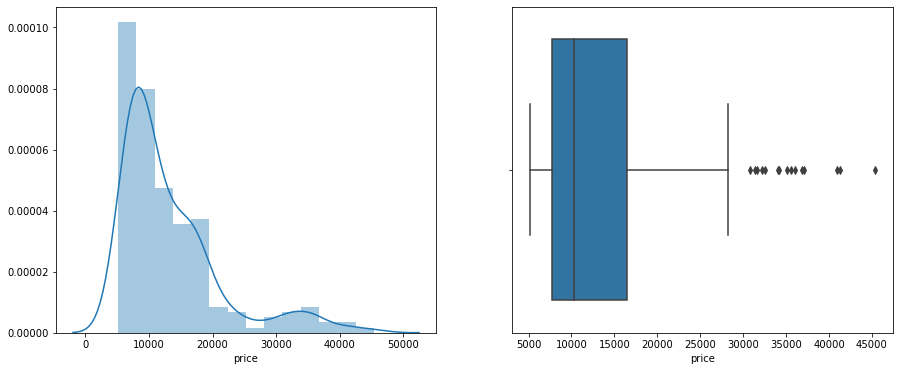

In [433]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.distplot(car_price.price)
plt.subplot(1,2,2)
sns.boxplot(car_price.price)
plt.show()

In [434]:
print(car_price.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


### Inferences

From the above data we can clearly see that the price distribution is rightly skewed and approximately 80% of data are lies under 18500.00

There also a huge difference between mean and median.

#### Visualizing categorical data

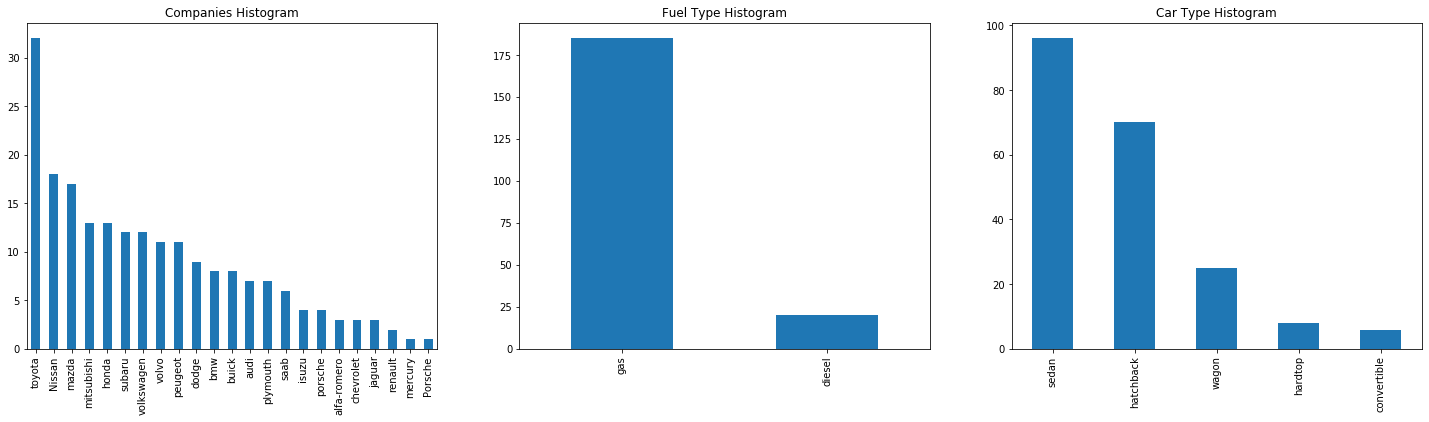

In [435]:
plt.figure(figsize=(25, 6))
plt.subplot(1,3,1)
plt1 = car_price.CompanyName.value_counts().plot('bar')
plt.title('Companies Histogram')

plt.subplot(1,3,2)
plt1 = car_price.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram') 
         
plt.subplot(1,3,3)
plt1 = car_price.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram')

plt.show()

### Inferences

From the above graph it can clearly visible that Toyata is the most popularity brand.

Most of the people are prefering gas type engine vehicle.

It seems that sedan is the most popular car type.

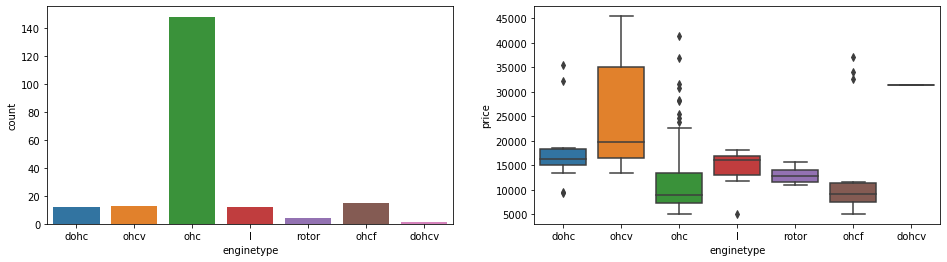

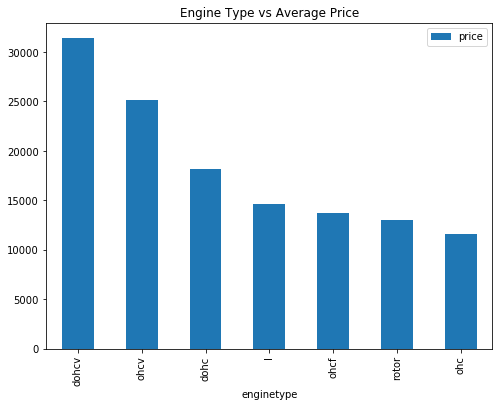

In [436]:
# enginetype
plt.figure(figsize = (16,4))
plt.subplot(121)
sns.countplot(x = car_price.enginetype)
plt.xlabel= car_price.enginetype

plt.subplot(122)
sns.boxplot(x = car_price.enginetype, y= car_price.price)
plt.xlabel= car_price.enginetype
df = pd.DataFrame(car_price.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()
plt.show()

### Inferences

From the above graph we can clearly observe that "obhcv" is the most popular engine.

<Figure size 1800x1800 with 0 Axes>

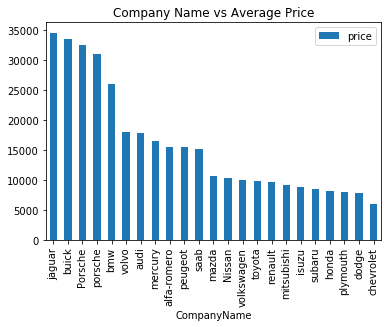

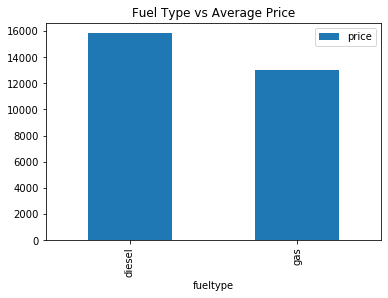

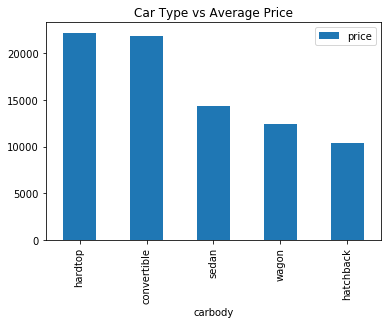

In [437]:
plt.figure(figsize=(25, 25))

df = pd.DataFrame(car_price.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
# plt.show()

df = pd.DataFrame(car_price.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
# plt.show()

df = pd.DataFrame(car_price.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

### Inferences

It can be seen that Jaguar have the highest average selling price

The vehicles have disel engines have higer price than petrol

The sedan type carbody has average selling price

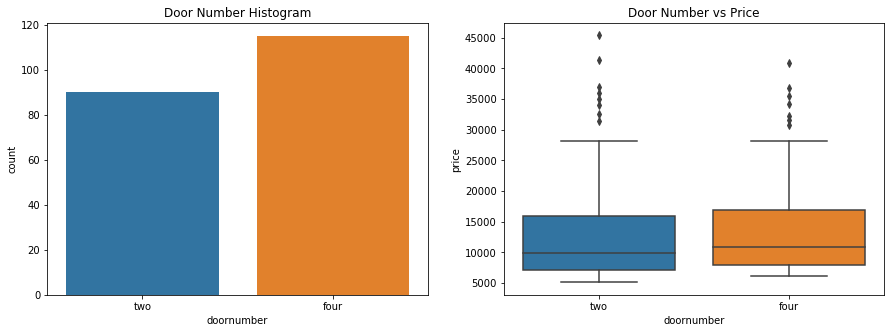

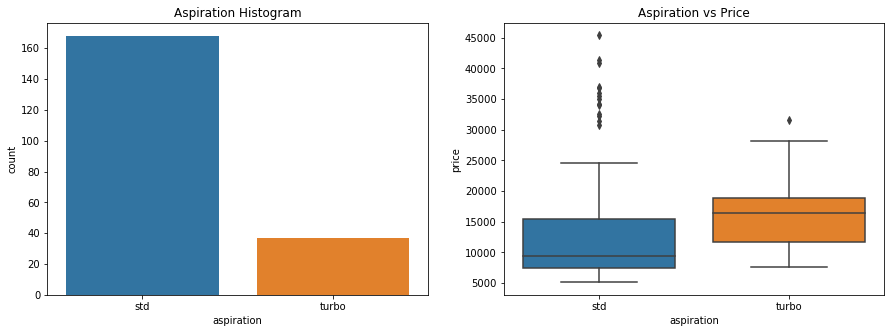

In [438]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(car_price.doornumber)

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=car_price.doornumber, y=car_price.price)

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(car_price.aspiration)

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=car_price.aspiration, y=car_price.price)

plt.show()

### Inferences

From the above data we can decide that 

The vehicles have 4 doors are popular than having 2 doors

The vehicles having standard aspiration is more popular but the engine having turbo aspiration are having high price than standard.

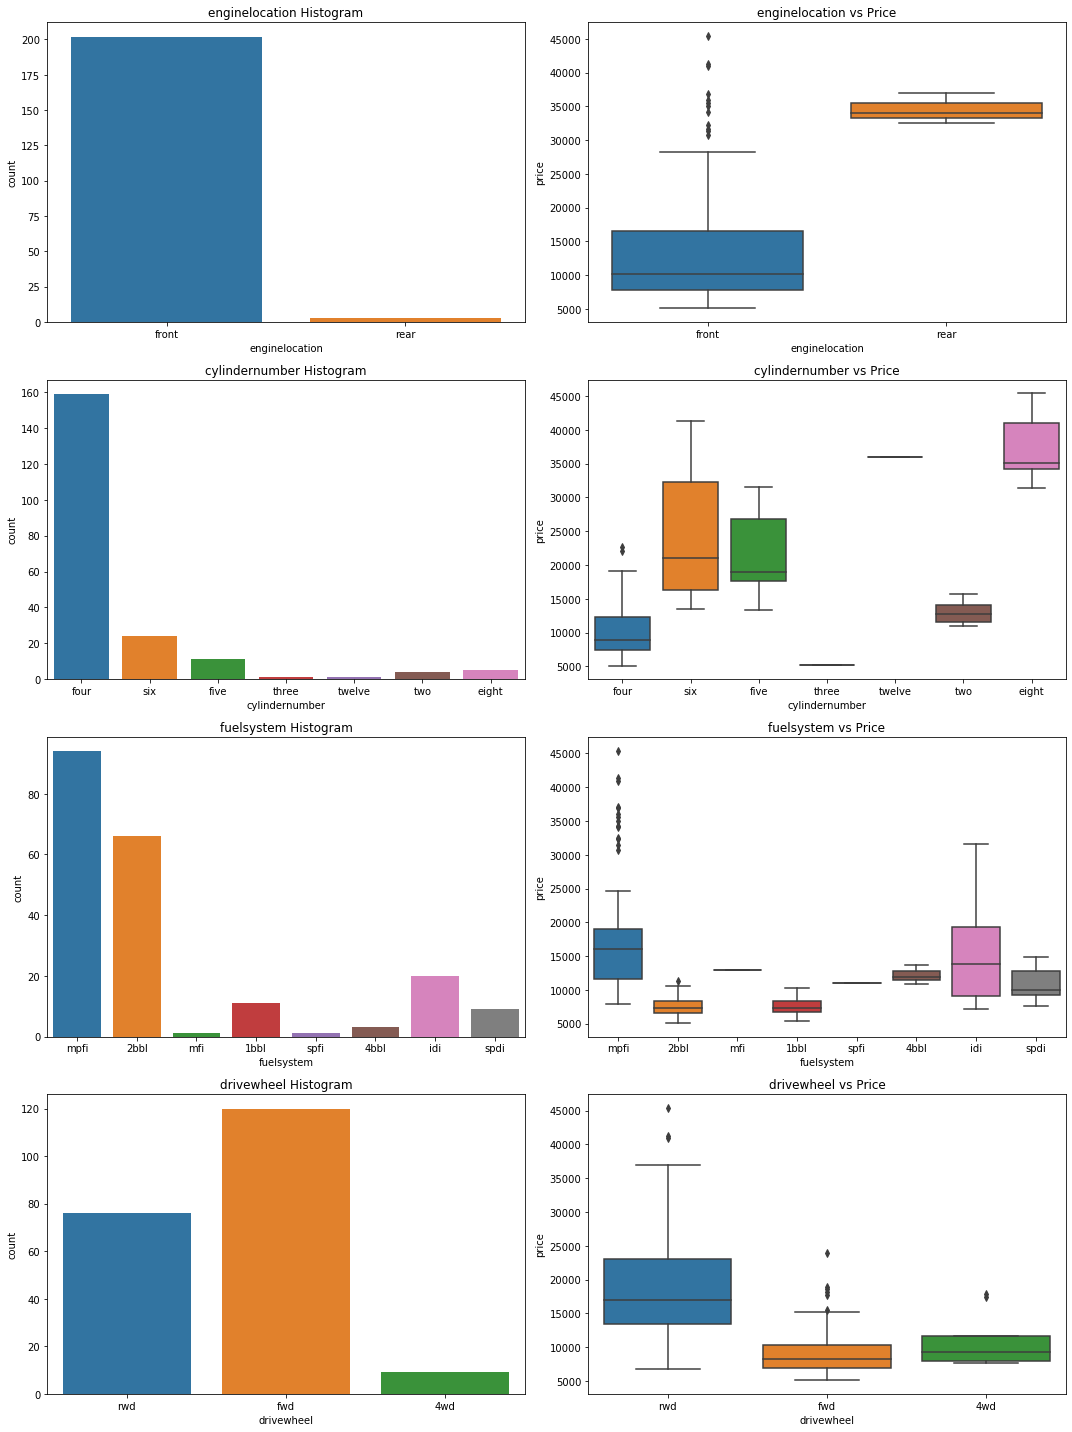

In [439]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(car_price[x])
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=car_price[x], y=car_price.price)
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

## Inferences

1) Engine location is significantly affecting the price because the cars have engine at front is popular than rear.

2) But the rear engine positioned vehicle have higher price than front positioned engine.

3) 4 cylidere engine vehicle have highest popularity, but have lowest average price.

4) mpfi type fuel system highly popular than others, also have hgher average price.

5) It can clearly observe that forward wheel drive system is highly popular with lowest average price.

#### Visualization of Numerical variables

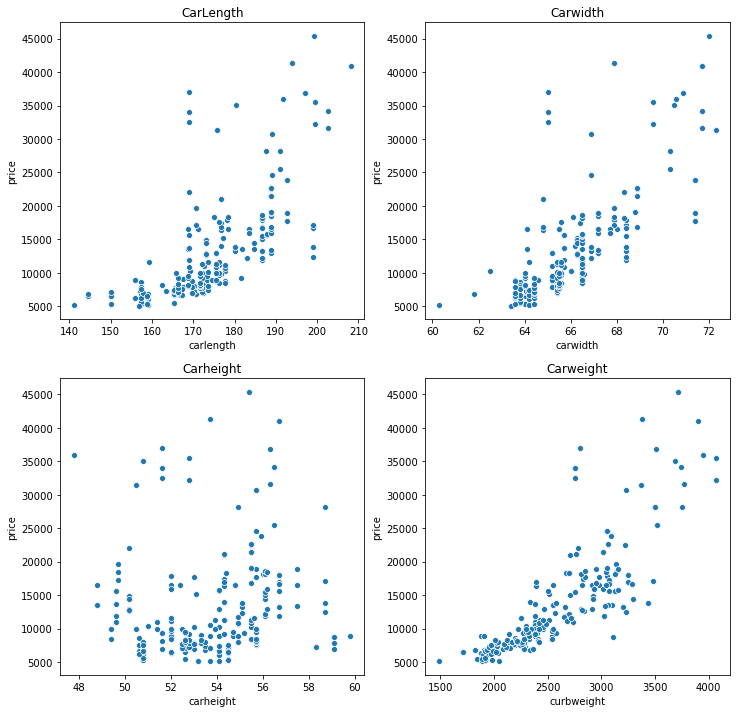

In [440]:
plt.figure(figsize = (12,12))
plt.subplot(221)
sns.scatterplot(x = "carlength", y = "price", data= car_price)
plt.title("CarLength")

plt.subplot(222)
sns.scatterplot(x = "carwidth", y = "price", data = car_price)
plt.title("Carwidth")

plt.subplot(223)
sns.scatterplot(x = "carheight", y = "price", data = car_price)
plt.title("Carheight")

plt.subplot(224)
sns.scatterplot(x = "curbweight", y = "price", data = car_price)
plt.title("Carweight")

plt.show()

From the above scatterplots we observed that "carlength", "carwidth" and "curbweight" have positive relationship with price but carheight and price have no significant relationship.

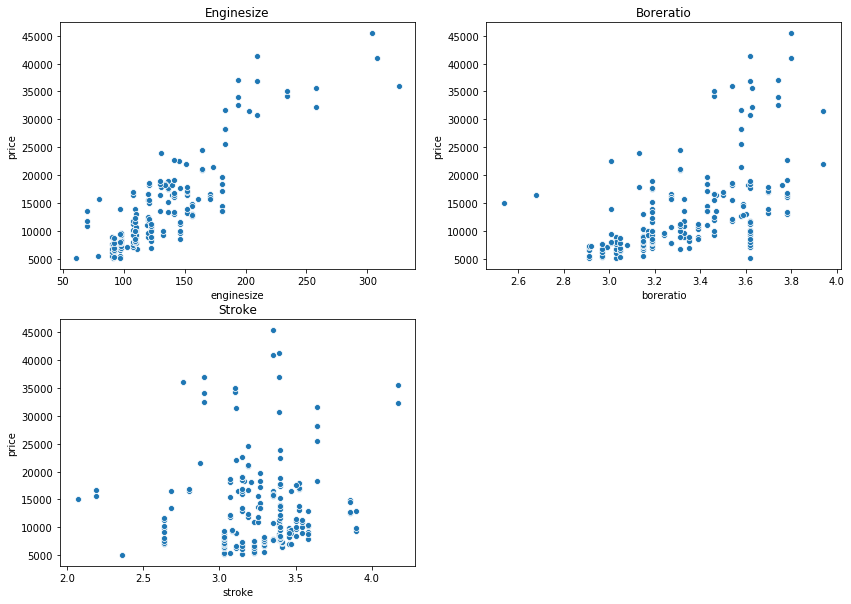

In [441]:

plt.figure(figsize = (14,10))
plt.subplot(2,2,1)
sns.scatterplot(x = "enginesize", y = "price", data = car_price)
plt.title("Enginesize")


plt.subplot(2,2,2)
sns.scatterplot(x = "boreratio", y = "price", data = car_price)
plt.title("Boreratio")

plt.subplot(2,2,3)
sns.scatterplot(x = "stroke", y = "price", data = car_price)
plt.title("Stroke")

plt.show()

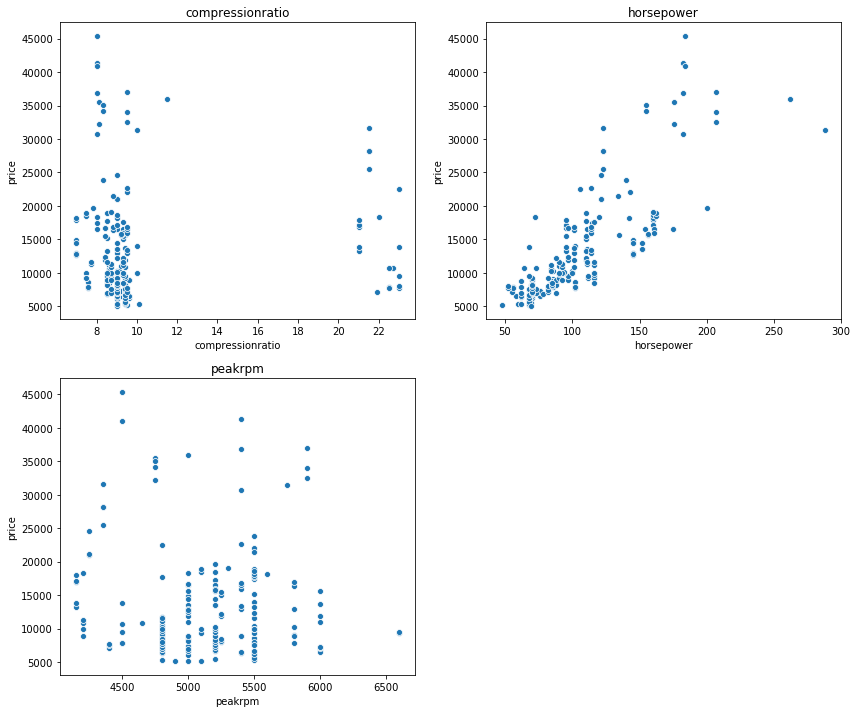

In [442]:
plt.figure(figsize = (14,12))
plt.subplot(2,2,1)
sns.scatterplot(x = "compressionratio", y = "price", data = car_price)
plt.title("compressionratio")

plt.subplot(2,2,2)
sns.scatterplot(x = "horsepower", y = "price", data = car_price)
plt.title("horsepower")

plt.subplot(2,2,3)
sns.scatterplot(x = "peakrpm", y = "price", data = car_price)
plt.title("peakrpm")

plt.show()

We can observe that horsepower have positive relationship with price but compression ratio and peakrpm have no significant relationship with price.

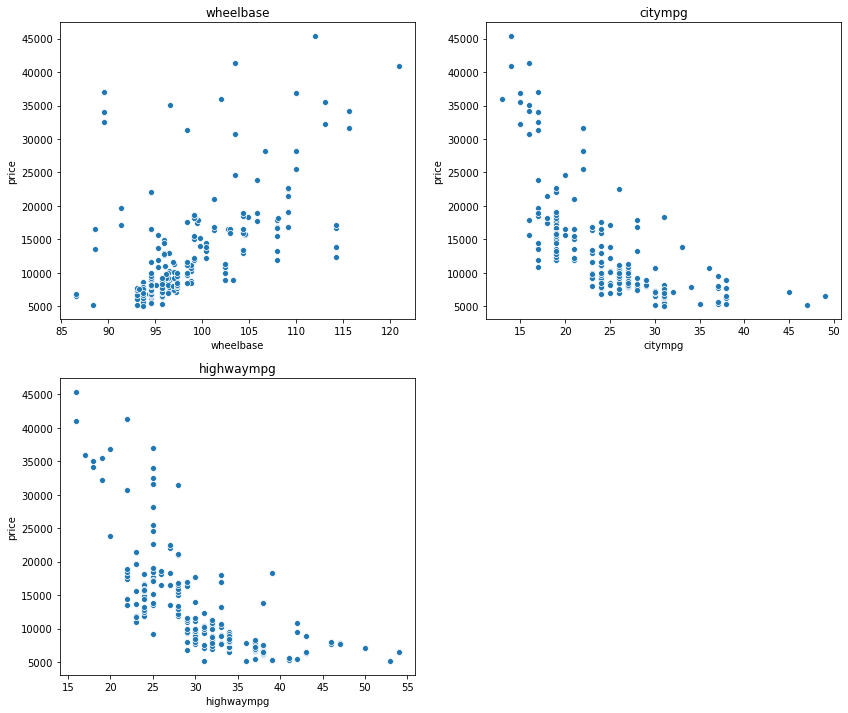

In [443]:
plt.figure(figsize = (14,12))
plt.subplot(221)
sns.scatterplot(x = "wheelbase", y = "price", data = car_price)
plt.title("wheelbase")

plt.subplot(222)
sns.scatterplot(x = "citympg", y = "price", data = car_price)
plt.title("citympg")

plt.subplot(223)
sns.scatterplot(x = "highwaympg", y = "price", data = car_price)
plt.title("highwaympg")

plt.show()

From above observation we can clearly observe that citympg and highwaympg have negative relationship with price  and wheelbase have positive relationship with price.

### EDA


#### Deriving New Features

In [444]:
#Derived a new feature named FuelEconomy by calculating with constant factors of "citympg" and "highwaympg"

car_price["FuelEconomy"]  = (0.55*car_price["citympg"]) + (0.45*car_price["highwaympg"])
car_price.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,FuelEconomy
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80


In [445]:
#Basis on average price of each company we binning the dataframe into 3 categories  ['Budget','Medium','Highend']


car_price['price'] = car_price['price'].astype('int')
temp = car_price.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
car_price_bin=['Budget','Medium','Highend']
car_price['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=car_price_bin)
car_price.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,FuelEconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


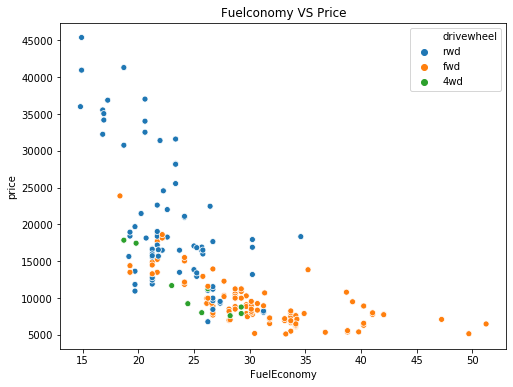

In [446]:
# Bivariate Analysis Between Fuel Economy and price

plt.figure(figsize = (8,6))
sns.scatterplot(x = "FuelEconomy", y = "price", data = car_price, hue = car_price["drivewheel"])
plt.title("Fuelconomy VS Price")
plt.show()

we can clearly observe that peoples are prefering high fueleconomy with lower price

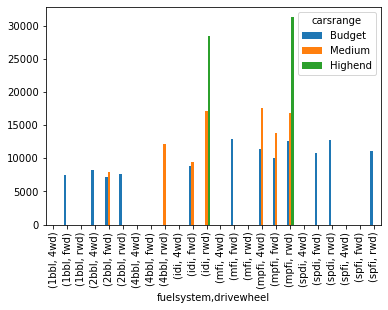

In [447]:
df = pd.DataFrame(car_price.groupby(["fuelsystem", "drivewheel","carsrange"])['price'].mean().unstack(fill_value = 0))
df.plot.bar()
plt.show()

From above data it looks like the cars have mpfi engince with rearwheel drive system are costly then others.

## Data Preparation


From the above analysis and figures we concluded the significant variables which will help us to built a significant linear regression model 

In [448]:
car_price_lr = car_price[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'FuelEconomy', 'carlength','carwidth', 'carsrange']]
car_price_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,FuelEconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


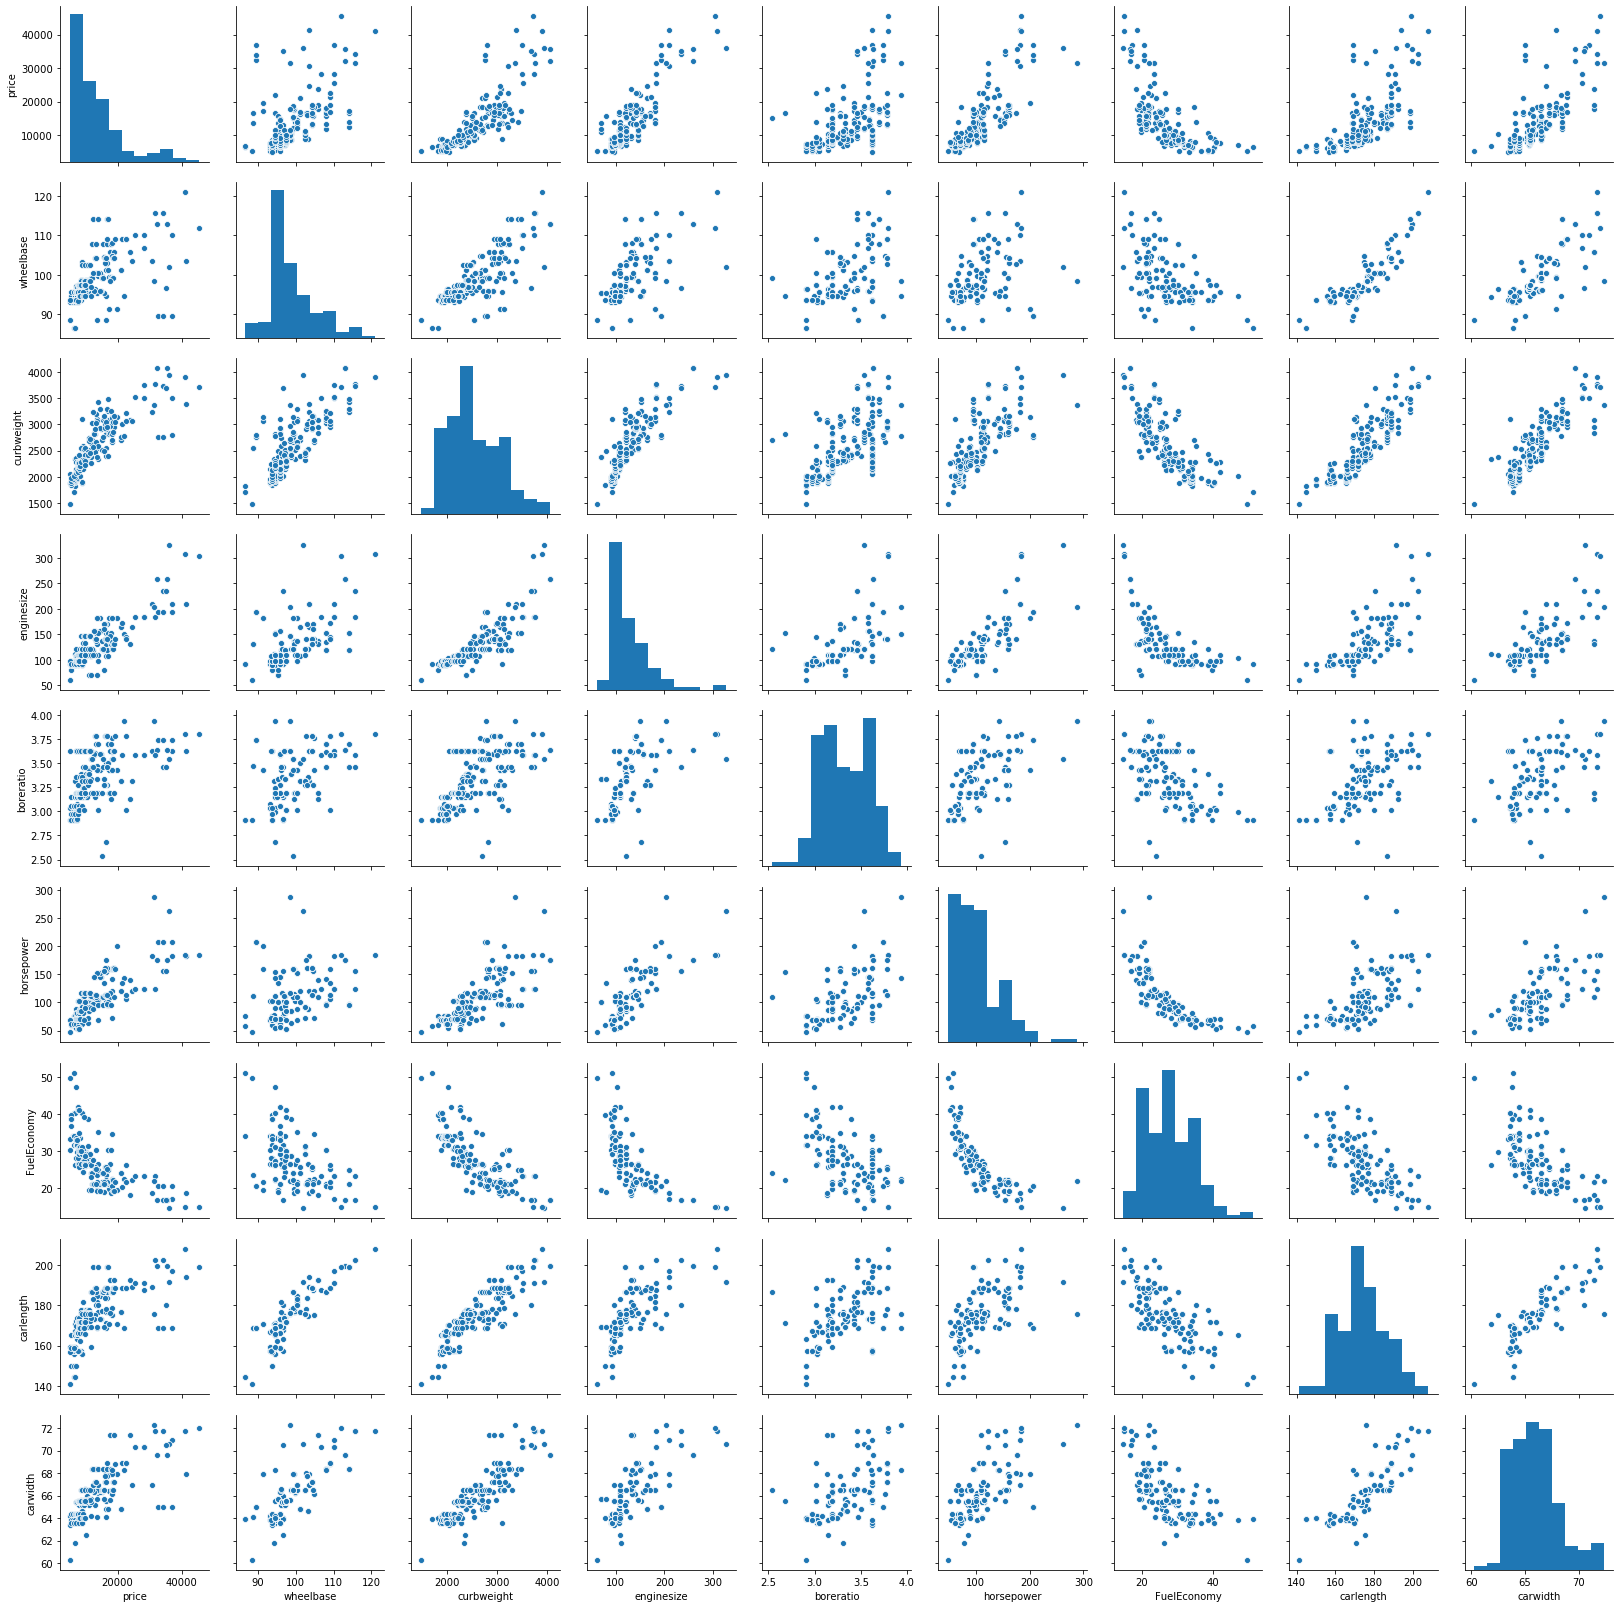

In [449]:
sns.pairplot(car_price_lr)
plt.show()

In [450]:
car_price_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
price             205 non-null int32
fueltype          205 non-null object
aspiration        205 non-null object
carbody           205 non-null object
drivewheel        205 non-null object
wheelbase         205 non-null float64
curbweight        205 non-null int64
enginetype        205 non-null object
cylindernumber    205 non-null object
enginesize        205 non-null int64
boreratio         205 non-null float64
horsepower        205 non-null int64
FuelEconomy       205 non-null float64
carlength         205 non-null float64
carwidth          205 non-null float64
carsrange         205 non-null category
dtypes: category(1), float64(5), int32(1), int64(3), object(6)
memory usage: 23.6+ KB


In [451]:
car_price_lr.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,FuelEconomy,carlength,carwidth
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,13276.702439,98.756585,2555.565854,126.907317,3.329756,104.117073,27.708780,174.049268,65.907805
std,7988.848977,6.021776,520.680204,41.642693,0.270844,39.544167,6.649183,12.337289,2.145204
min,5118.000000,86.600000,1488.000000,61.000000,2.540000,48.000000,14.800000,141.100000,60.300000
25%,7788.000000,94.500000,2145.000000,97.000000,3.150000,70.000000,21.950000,166.300000,64.100000
50%,10295.000000,97.000000,2414.000000,120.000000,3.310000,95.000000,26.700000,173.200000,65.500000
75%,16503.000000,102.400000,2935.000000,141.000000,3.580000,116.000000,31.800000,183.100000,66.900000
max,45400.000000,120.900000,4066.000000,326.000000,3.940000,288.000000,51.250000,208.100000,72.300000


#### Now we have to handle the categorical variables by creating dummy variables for each categorical variable

In [452]:
# list of categorical variables [fueltype, aspiration, carbody, drivewheel, enginetype, cylindernumber, carsrange]

def dummy (x, df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
car_price_lr = dummy('fueltype',car_price_lr)
car_price_lr = dummy('aspiration',car_price_lr)
car_price_lr = dummy('carbody',car_price_lr)
car_price_lr = dummy('drivewheel',car_price_lr)
car_price_lr = dummy('enginetype',car_price_lr)
car_price_lr = dummy('cylindernumber',car_price_lr)
car_price_lr = dummy('carsrange',car_price_lr)

car_price_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,FuelEconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [453]:
car_price_lr.shape

(205, 31)

### Splitting Data Into Train and Test

In [454]:
df_train,df_test= train_test_split(car_price_lr,train_size = 0.7, test_size = 0.3, random_state = 100) 

In [455]:
df_train.shape

(143, 31)

In [456]:
df_test.shape

(62, 31)

Feature scaling

In [457]:
#creating scaler object

scaler = MinMaxScaler()

In [458]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','FuelEconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [459]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,FuelEconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


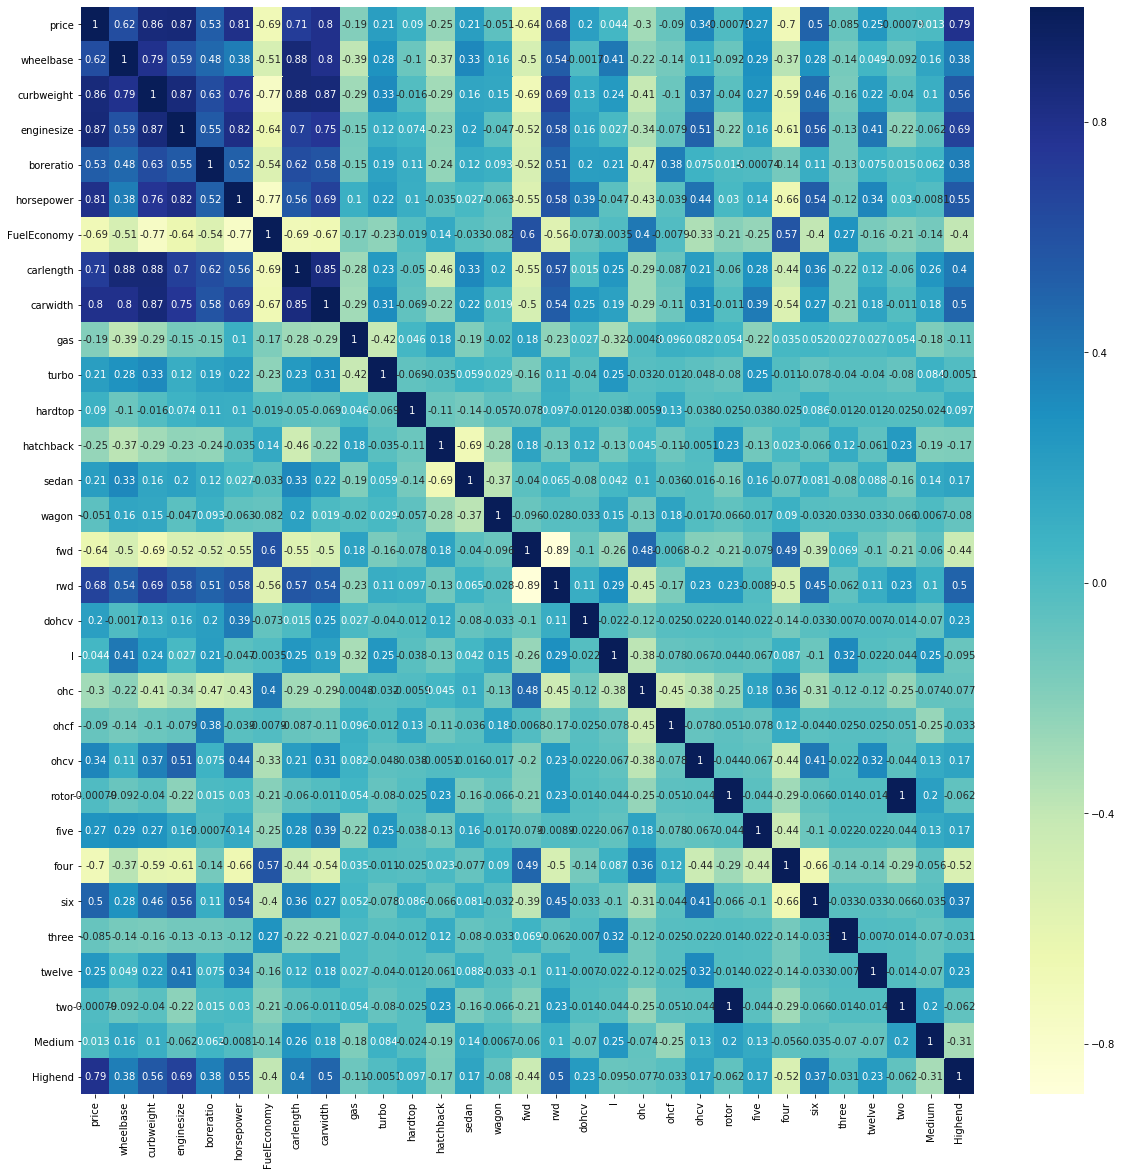

In [460]:
plt.figure(figsize = (20,20))
sns.heatmap(df_train.corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [461]:
y_train = df_train.pop("price")
X_train = df_train
y_train.head()


122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

Build a regression model for the whole Dataset

In [462]:
X_train_lm = sm.add_constant(X_train)
X_train_lm.head()

,const,wheelbase,curbweight,enginesize,boreratio,horsepower,FuelEconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,1.0,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,1.0,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,1.0,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1.0,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,1.0,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [463]:
lm = sm.OLS(y_train, X_train_lm).fit()
lm.params

const         -0.006478
wheelbase      0.109918
curbweight     0.285740
enginesize     0.045123
boreratio     -0.105075
horsepower     0.606996
FuelEconomy    0.133918
carlength     -0.056797
carwidth       0.208057
gas           -0.020382
turbo         -0.009720
hardtop       -0.099361
hatchback     -0.138808
sedan         -0.120880
wagon         -0.140202
fwd           -0.018091
rwd            0.014943
dohcv         -0.330602
l             -0.002950
ohc            0.075512
ohcf           0.116000
ohcv          -0.042628
rotor         -0.000213
five          -0.123644
four          -0.104594
six           -0.082732
three          0.071756
twelve        -0.175217
two           -0.000213
Medium         0.045498
Highend        0.226059
dtype: float64

In [464]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     72.82
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           3.66e-60
Time:                        12:59:49   Log-Likelihood:                 230.02
No. Observations:                 143   AIC:                            -400.0
Df Residuals:                     113   BIC:                            -311.2
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0065      0.118     -0.055      

Now we have to do feature selection by VIF method

### VIF checking

In [465]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,rotor,inf
27,two,inf
1,curbweight,176.55
23,four,142.46
6,carlength,136.08
2,enginesize,113.18
7,carwidth,87.79
4,horsepower,58.77
0,wheelbase,53.80
3,boreratio,53.25


In [466]:
lm = LinearRegression()
rfe = RFE(lm,10)
rfe = rfe.fit(X_train, y_train)

In [467]:
list(zip(X_train, rfe.support_ , rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('FuelEconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 20),
 ('Medium', False, 12),
 ('Highend', True, 1)]

In [468]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'FuelEconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

select Variables having lower P-value

In [469]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,FuelEconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


In [470]:
X_train_sm1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           1.29e-70
Time:                        12:59:50   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

#### we can clearly observe that "twelve" variable have highest P-value so we have to drop that

In [471]:
X_train_sm1 = X_train_sm1.drop(["twelve"], axis =1)


In [472]:
lm = sm.OLS(y_train, X_train_sm1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           4.25e-71
Time:                        12:59:50   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

#### we can clearly observe that "FuelEconomy" variable have highest P-value so we have to drop that

In [473]:
X_train_sm1 = X_train_sm1.drop(["FuelEconomy"], axis =1)


In [474]:
lm = sm.OLS(y_train, X_train_sm1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           7.85e-72
Time:                        12:59:50   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

##### Now we have to check the VIF for the builted model

In [475]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values, i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


#### we can see that "curbweight" variable have higher VIF value so we have to drop curbweight.

In [476]:
X_train_sm1 = X_train_sm1.drop(["curbweight"], axis =1)

In [477]:
lm = sm.OLS(y_train, X_train_sm1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           4.70e-70
Time:                        12:59:50   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [478]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values, i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


#### we can see that "sedan" variable have higher VIF value so we have to drop sedan.

In [479]:
X_train_sm1 = X_train_sm1.drop(["sedan"], axis =1)

In [480]:
lm = sm.OLS(y_train, X_train_sm1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           1.68e-69
Time:                        12:59:50   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [481]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values, i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,Highend,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


#### From the above linear model we can conclude that "wagon" variable have higher  p-value se we have to drop that

In [482]:
X_train_sm1 = X_train_sm1.drop(["wagon"], axis =1)

In [483]:
lm = sm.OLS(y_train, X_train_sm1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           1.57e-70
Time:                        12:59:50   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [484]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values, i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


From the above VIF analysis 'dohcv' variable have lower VIF value and lower p-value se we are droping  that variable to check it is affecting our model or not.

In [485]:
X_train_sm1 = X_train_sm1.drop(["dohcv"], axis =1)

In [486]:
lm = sm.OLS(y_train, X_train_sm1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           1.04e-67
Time:                        12:59:50   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [487]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values, i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,Highend,1.53
3,hatchback,1.10


## From the above analysis we can conclude that now we get the significant model 

## So we have to do Residual Analysis now

In [488]:
y_trin_pred = lm.predict(X_train_sm1)
y_trin_pred

122    0.069643
125    0.593598
166    0.115545
1      0.158405
199    0.354161
         ...   
87     0.210439
103    0.312739
67     0.664255
24     0.028247
8      0.452291
Length: 143, dtype: float64

Text(0.5, 0.98, 'Error Terms')

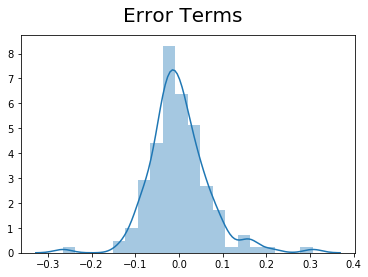

In [489]:
fig = plt.figure()
sns.distplot((y_train - y_trin_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)

### Now we have to do Prediction And Evaluation

Scaling on test data test data set with selected variables as same as train dataset

In [490]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','FuelEconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [491]:
df_test.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,FuelEconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.000000
mean,0.209644,0.370121,0.371743,0.228835,0.667691,0.359521,0.459039,0.486741,0.375212,0.887097,0.177419,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.435484,0.112903
std,0.210911,0.179970,0.222354,0.188416,0.228484,0.252970,0.234994,0.183964,0.208977,0.319058,0.385142,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.499868,0.319058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.076536,0.265306,0.219125,0.126638,0.515873,0.140323,0.254604,0.389764,0.221053,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,0.136847,0.327988,0.344065,0.183406,0.674603,0.312903,0.434622,0.475591,0.326316,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,0.280049,0.482507,0.540726,0.287118,0.857143,0.432258,0.602210,0.642126,0.421053,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000


Dividing test data set to X,y

In [492]:
y_test = df_test.pop('price')
X_test = df_test

Now we can use our trained model to predict the test model

In [493]:
X_train_sm1 = X_train_sm1.drop("const", axis  =1)
X_test_new = X_test[X_train_sm1.columns]

In [494]:
X_test_new = sm.add_constant(X_test_new)

In [495]:
y_pred = lm.predict(X_test_new)
y_pred

160    0.047811
186    0.136225
59     0.133637
165    0.150432
140   -0.010054
         ...   
28     0.107261
29     0.298549
182    0.042504
40     0.014119
128    0.741297
Length: 62, dtype: float64

In [496]:
r2_score(y_test, y_pred)

0.8614595209022033

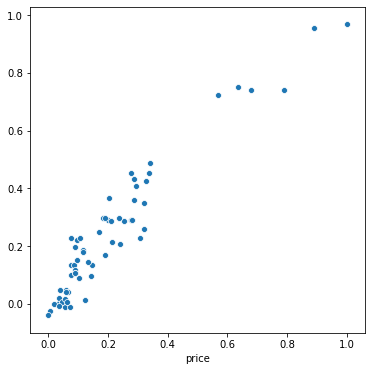

In [497]:
plt.figure(figsize = (6,6))
sns.scatterplot(y_test, y_pred)
plt.show()

In [498]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           1.04e-67
Time:                        12:59:52   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

### Inferences

From the above predicted model we can cnclude that the model is significant from the below features

1)  R^2 score(0.899), adj R^2 (0.896) are likely to be 90% significant

2)  The F-statistics (1.04e-67) is very low likely to be zero.

3)  All p-values are less than 0.05 


So the predicted model is significant

